# SPDE

In this tutorial, we show how to use the API SPDE.

In [1]:
import gstlearn as gl
import gstlearn.plot as gp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dat = gl.Db.create()
dat["x"] = np.random.uniform(size=1000)
dat["y"] = np.random.uniform(size=1000)
dat["Z"] = np.random.normal(size=1000)
dat.setLocators(["x","y"],gl.ELoc.X)
dat.setLocators(["Z"],gl.ELoc.Z)

grid = gl.DbGrid.create([150,150],[0.01,0.01],[-0.25,-0.25])
model = gl.Model.createFromParam(gl.ECov.BESSEL_K,param=1,range=0.2)

spde = gl.SPDE()
spde.init(model,grid,dat,gl.ESPDECalcMode.KRIGING)
        

In [3]:
spde.compute()

In [4]:
spde.query(grid)

3

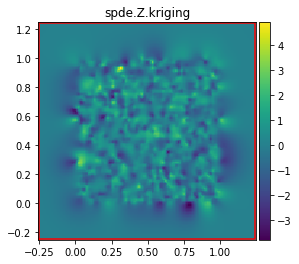

In [5]:
gp.plot(grid)

In [6]:
spde.computeLogDet(1)

Q 1   12800.7
Q + AtDiA13053.6
Polynomials of degree 10000
8.10795 1.96529 -0.965595 0.632559 -0.466187 0.366477 -0.300098 0.252763 -0.21733 0.18983 -0.167882 0.149972 -0.135088 0.122533 -0.111806 0.102542 -0.0944646 0.087365 -0.0810796 0.0754793 -0.070461 0.0659412 -0.0618516 0.0581357 -0.0547466 0.0516447 -0.0487966 0.0461739 -0.0437522 0.0415105 -0.0394305 0.0374963 -0.0356942 0.0340119 -0.0324387 0.0309651 -0.0295825 0.0282835 -0.0270613 0.0259099 -0.0248238 0.023798 -0.0228283 0.0219105 -0.0210409 0.0202163 -0.0194336 0.0186901 -0.0179831 0.0173104 -0.0166699 0.0160594 -0.0154772 0.0149217 -0.0143912 0.0138844 -0.0133998 0.0129363 -0.0124926 0.0120678 -0.0116607 0.0112705 -0.0108963 0.0105373 -0.0101926 0.00986166 -0.0095437 0.00923812 -0.00894431 0.00866172 -0.00838982 0.00812811 -0.00787613 0.00763343 -0.00739961 0.00717425 -0.00695699 0.00674748 -0.00654539 0.00635039 -0.00616219 0.0059805 -0.00580505 0.00563559 -0.00547186 0.00531365 -0.00516073 0.00501288 -0.00486992 0.004731

nan

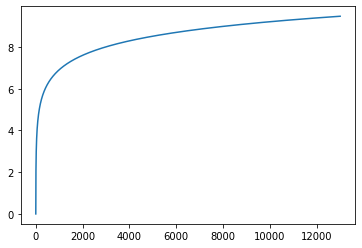

In [7]:

class Myfunc(gl.AFunction):
    def __init__(self):
        pass
    def eval(self,x):
        return np.log(x)
    
a=Myfunc()
plt.plot(np.array([a.eval(i) for i in range(1,13000)]))

In [11]:
ch = gl.Chebychev()
ch.fit(a,1,13000)

TypeError: Wrong number or type of arguments for overloaded function 'Chebychev_fit'.
  Possible C/C++ prototypes are:
    Chebychev::fit(std::function< double (double) >,double,double,double)
    Chebychev::fit(AFunction *,double,double,double)


In [16]:
ch.display()
a = gl.AFunction()

Polynomials of degree 18446744073709551615

 

AttributeError: No constructor defined - class is abstract

In [15]:
setattr(gl.AFunction,"eval",ch.eval)

In [14]:
ch.fit(gl.AFun)

2